# <div style="text-align: center; background-color:pink; font-family:Georgia, serif; color: black; padding: 20px;line-height: 1;border-radius:5px; border: 2px solid black;">Seaborn</div>

# Introduction

* Seaborn is a powerful Python visualization library built on top of Matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics. 
* Seaborn simplifies the process of creating complex visualizations and is particularly well-suited for visualizing data with relationships, distributions, and categories. 
* And integrates with the functionality provided by Pandas DataFrames.

# Installation

In [ ]:
# pip install seaborn

# Import Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the built-in 'tips' dataset
tips = sns.load_dataset('tips')

In [4]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
tips.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

# Heatmap:Displays matrix data with color intensities representing values
* Use: Visualizes matrix-like data, often used to display correlations or tabular data with color encoding.
* Heatmap function expects numerical data,
* To create a heatmap, you need to prepare the data in a matrix format where both the rows and columns are categorical variables and the values are numerical
* Example: sns.heatmap(data, annot=True, cmap="YlGnBu")
* Explanation: Shows how data values vary across a grid. Colors represent different ranges of values, making it easy to spot patterns or outliers.

In [10]:
# Pivot data for heatmap
data = tips.pivot_table(index='day', columns='time', values='total_bill', aggfunc='mean')
data

time,Lunch,Dinner
day,,
Thur,17.664754,18.780000
Fri,12.845714,19.663333
Sat,NaN,20.441379
Sun,NaN,21.410000


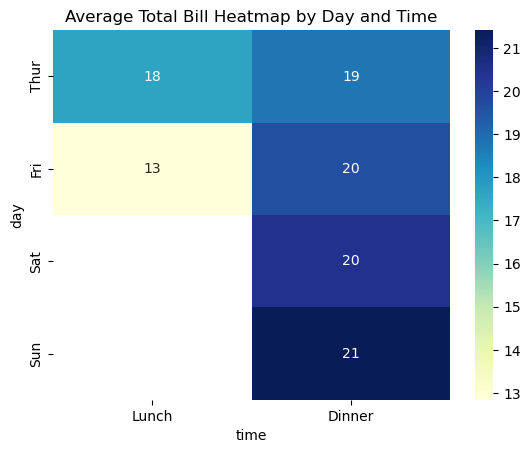

In [6]:
sns.heatmap(data,annot=True,cmap="YlGnBu")
plt.title("Average Total Bill Heatmap by Day and Time")
plt.show()

* annot=True: Adds the numerical values inside each cell.

## Interpreting This Heatmap:

#### High and Low Values:

* Darker Colors: Represent higher average total_bill values.
* Lighter Colors: Represent lower average total_bill values.
* Different colors or shades represent different ranges of values. 
* For instance, darker colors might indicate higher values, while lighter colors represent lower values.
* By observing the color patterns, you can identify areas of high or low intensity in your data.
    
#### Patterns:

* You might observe that certain days (e.g., Sunday) have higher average total_bill compared to others (e.g., Tuesday).
* You might also see that the Dinner time has higher average bills compared to Lunch.

#### Comparisons:

* Day vs. Time: Comparing different days of the week, you can see which days have higher or lower average bills and how this varies with meal times.

#### Outliers and Anomalies:

* Highlight Outliers: Unusual values or anomalies in the dataset will stand out as different colors compared to the surrounding cells. For example, a significantly higher value in a heatmap can indicate an outlier or anomaly.

#### Distributions:

* Overall Distribution: Heatmaps can show the overall distribution of values in a matrix format. For example, a heatmap showing customer activity throughout a day and week can help you understand peak times and quieter periods.

* This information can be useful for business decisions, such as adjusting staffing levels or targeting promotions on specific days or times.

## Correlation Matrix:
* If you want to visualize the correlation between different numerical variables, you can use a correlation matrix.

In [7]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [8]:
# Compute correlation matrix
corr = tips[['total_bill', 'tip', 'size']].corr()


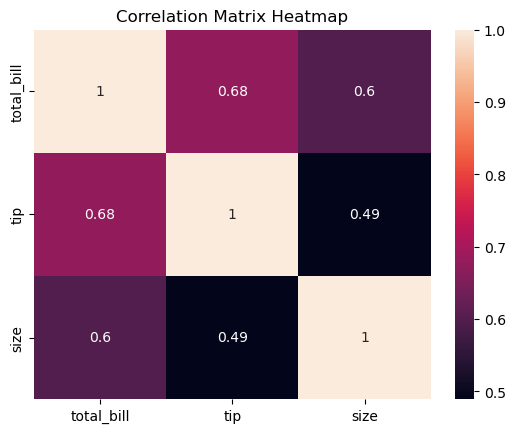

In [9]:
sns.heatmap(corr,annot=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Bar Chart

In [43]:
# Summing up tips by day
tip_sums = tips.groupby('day')['tip'].sum()

# Get the labels and values
labels = tip_sums.index
sizes = tip_sums.values

<Axes: xlabel='day'>

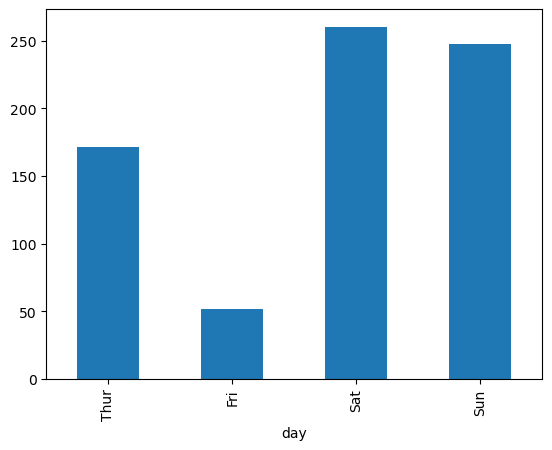

In [8]:
tips.groupby('day')['tip'].sum().plot(kind='bar')

<Axes: xlabel='day', ylabel='tip'>

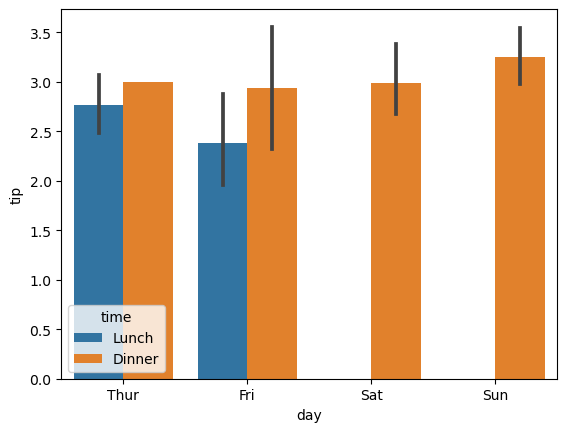

In [6]:
sns.barplot(x='day',y='tip',hue='time',data=tips)

<Axes: xlabel='day', ylabel='tip'>

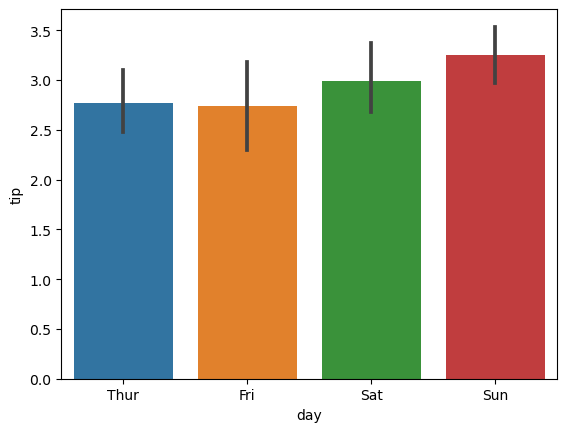

In [7]:
sns.barplot(x='day',y='tip',data=tips)

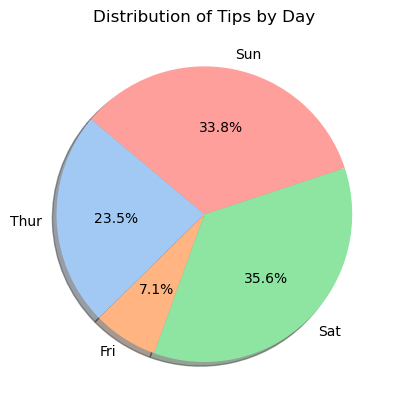

In [46]:
# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'),shadow=True)

# Add a title
plt.title('Distribution of Tips by Day')

# Display the chart
plt.show()

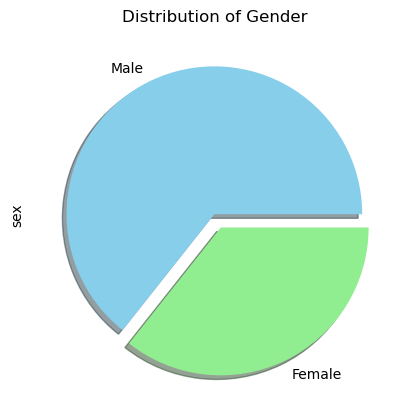

In [56]:
tips['sex'].value_counts().plot(kind='pie',explode=(0,0.1),shadow=True,colors=['skyblue', 'lightgreen'])
# Add a title
plt.title('Distribution of Gender')

# Display the chart
plt.show()

In [57]:
tips['day'].nunique()

4

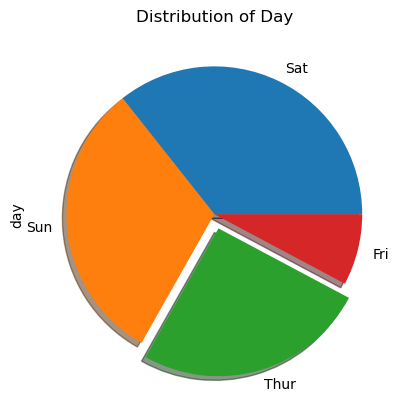

In [58]:
tips['day'].value_counts().plot(kind='pie',explode=(0,0,0.1,0),shadow=True)
# Add a title
plt.title('Distribution of Day')

# Display the chart
plt.show()

In [47]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# Line Plot (sns.lineplot)

* Shows the relationship between two continuous variables, with the points connected by lines.
* Often used to visualize time series data, where the x-axis typically represents time and the y-axis represents a quantitative measure.

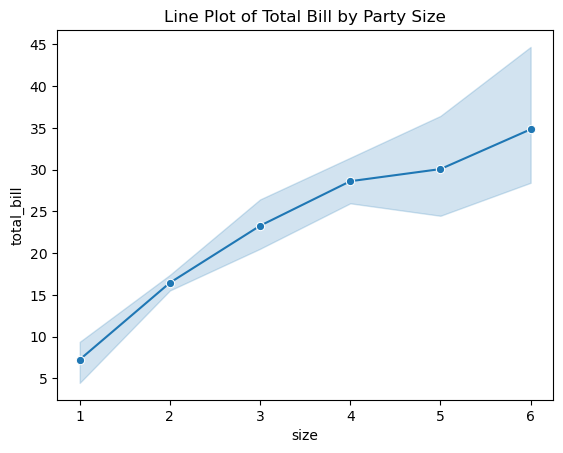

In [16]:
sns.lineplot(x='size', y='total_bill', data=tips, marker='o')
plt.title("Line Plot of Total Bill by Party Size")
plt.show()

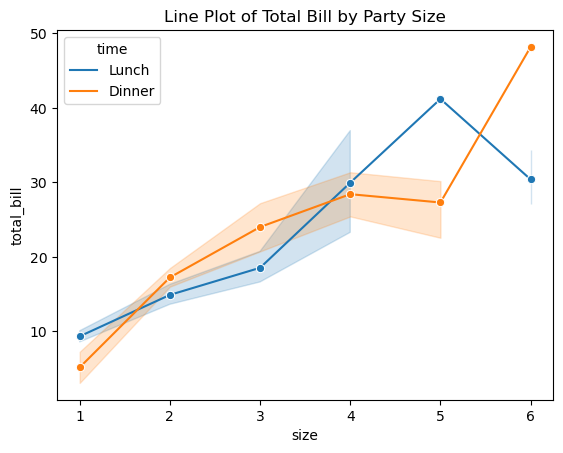

In [14]:
sns.lineplot(x='size', y='total_bill', data=tips, hue='time', marker='o')
plt.title("Line Plot of Total Bill by Party Size")
plt.show()

In [15]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# Scatter Plot

* Displays the relationship between two continuous variables.
* Each point represents an observation in the data. Scatter plots are useful for identifying trends, clusters, or outliers.

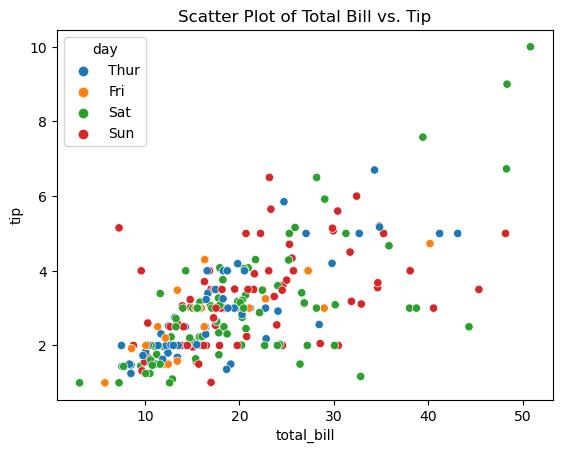

In [17]:
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='day')
plt.title("Scatter Plot of Total Bill vs. Tip")
plt.show()

# Bar Plot (sns.barplot)

* Compares the average value of a numerical variable across different categories.
* The height of each bar represents the mean value of the numerical variable for each category on the x-axis.

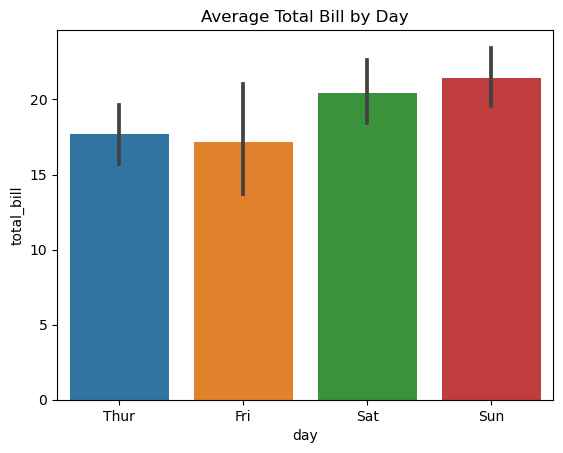

In [23]:
sns.barplot(x='day', y='total_bill', data=tips, estimator=np.mean)
plt.title("Average Total Bill by Day")
plt.show()

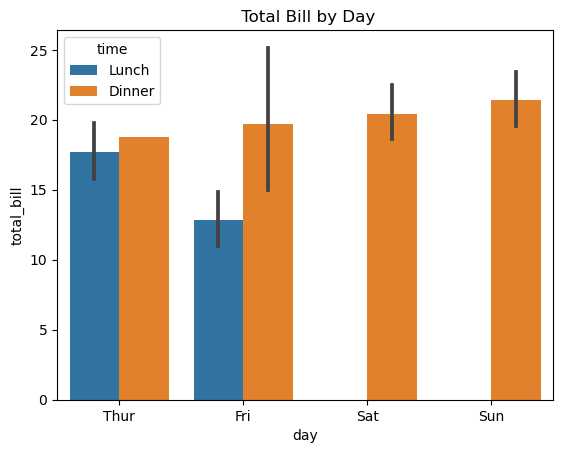

In [26]:
sns.barplot(x='day', y='total_bill',hue='time' ,data=tips)
plt.title(" Total Bill by Day")
plt.show()

In [21]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

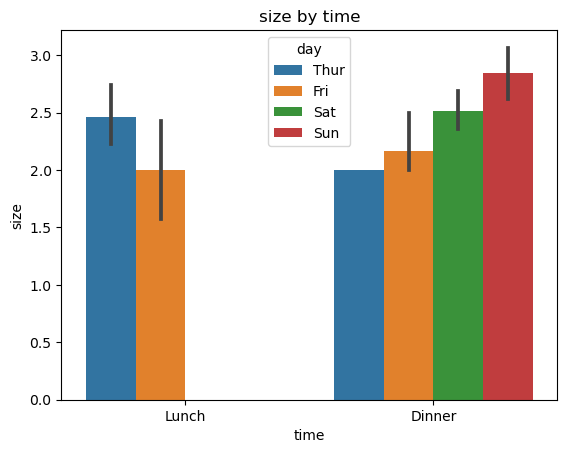

In [29]:
sns.barplot(x='time', y='size',hue='day' ,data=tips)
plt.title("size by time")
plt.show()

<Axes: xlabel='total_bill', ylabel='day'>

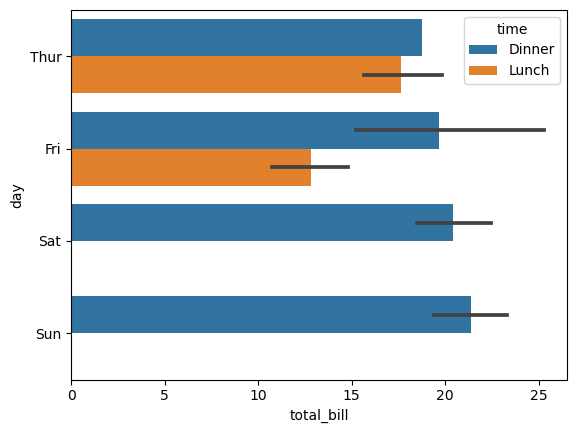

In [66]:
# Define the order of the hue categories
hue_order = ['Dinner', 'Lunch']

# Create a scatter plot with a specified hue order
sns.barplot(x="total_bill", y="day", hue="time", hue_order=hue_order, data=tips)


# Box Plot (sns.boxplot)

* Displays the distribution of a numerical variable across different categories.
*  Shows the median, quartiles, and potential outliers. It's useful for understanding the spread and skewness of data.


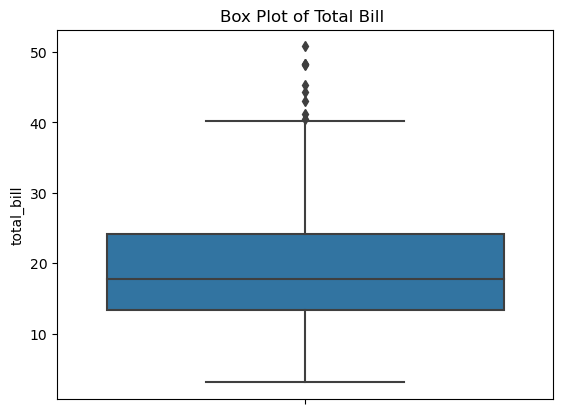

In [68]:
sns.boxplot(y='total_bill', data=tips)
plt.title("Box Plot of Total Bill ")
plt.show()

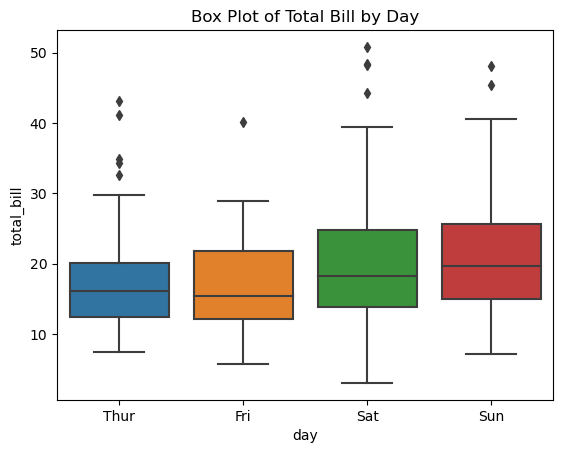

In [30]:
sns.boxplot(x='day', y='total_bill', data=tips)
plt.title("Box Plot of Total Bill by Day")
plt.show()--

# Violin Plot (sns.violinplot)

* Combines a box plot and a density plot to show the distribution of a numerical variable across categories.
*  Provides more information about the distribution of the data compared to a box plot, such as multimodal distributions ( It shows the median, quartiles, and outliers of the data, as well as the probability density function of the data.).

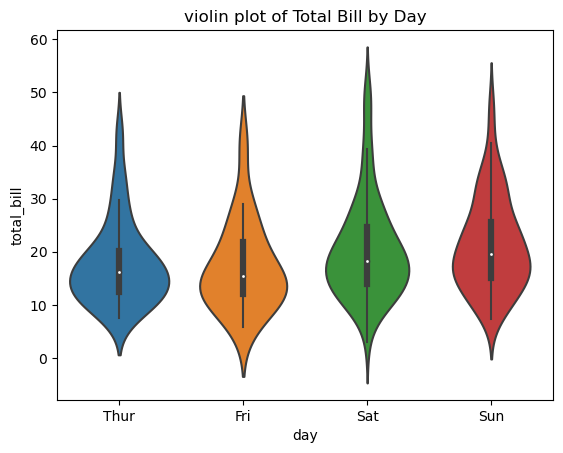

In [31]:
sns.violinplot(x='day', y='total_bill', data=tips)
plt.title("violin plot of Total Bill by Day")
plt.show()

* The body of the violin plot shows the distribution of the data, with the median marked by a white dot. 
* The whiskers show the range of the data, excluding outliers. 
* Outliers are shown as individual points.

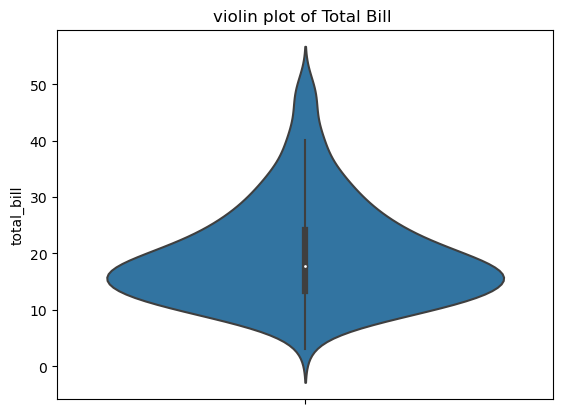

In [67]:
sns.violinplot(y='total_bill', data=tips)
plt.title("violin plot of Total Bill ")
plt.show()

# Pair Plot (sns.pairplot)

* Visualizes relationships between multiple pairs of variables in a dataset.
* Creates a grid of scatter plots and histograms to show pairwise relationships and distributions. Useful for exploring relationships in a dataset.


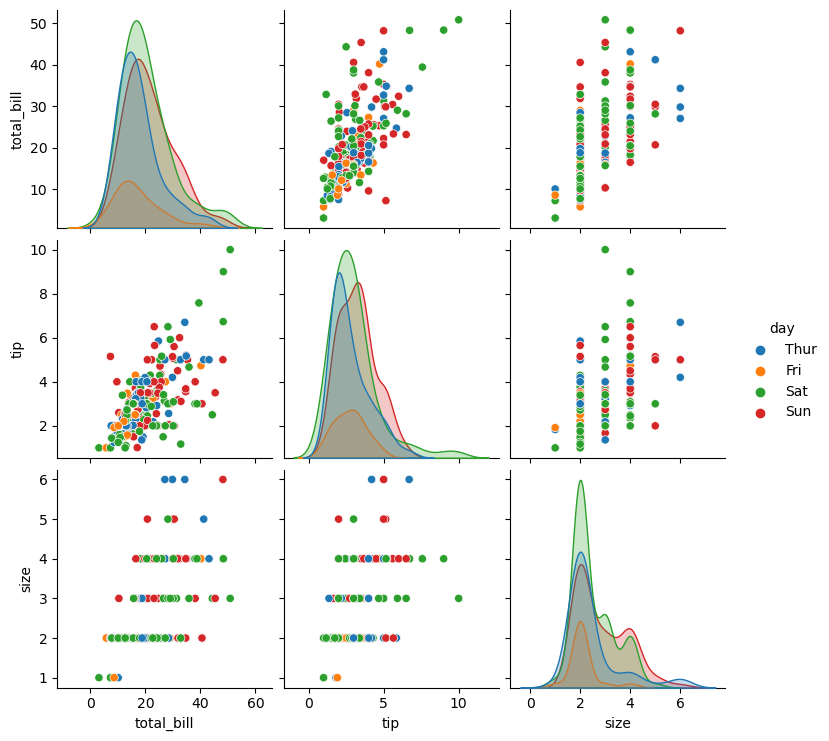

In [32]:
# Create pair plot
sns.pairplot(tips, hue='day')
plt.show()

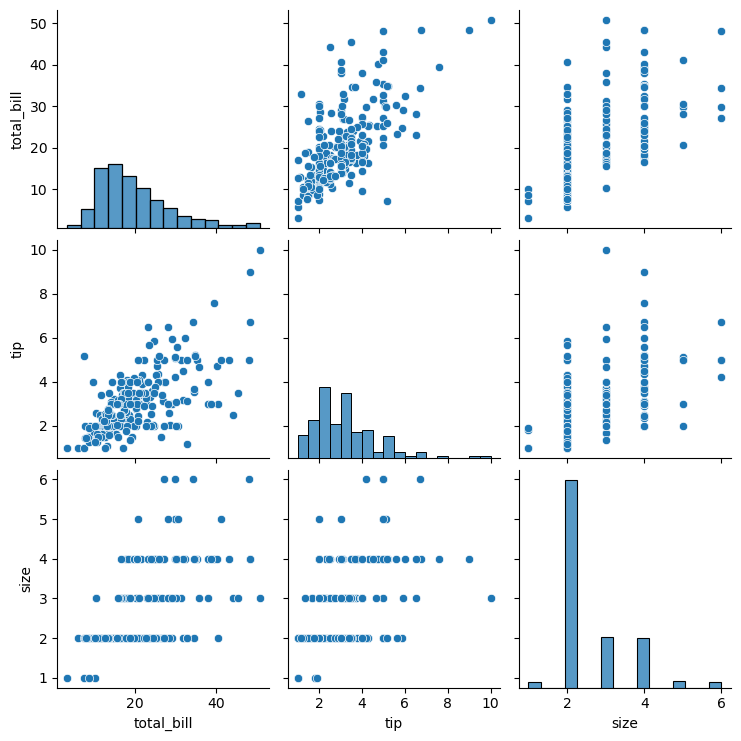

In [33]:
# Create pair plot
sns.pairplot(tips)
plt.show()

# Count Plot (sns.countplot)

* Displays the count of observations in each categorical bin.
* Similar to a bar plot, but specifically counts the occurrences of each category. Useful for categorical data analysis.


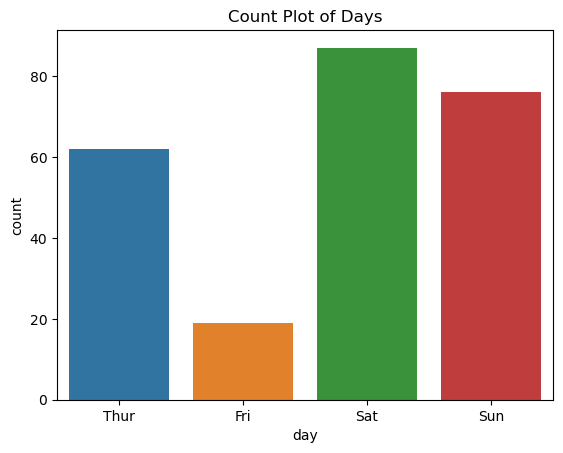

In [34]:
# Create count plot
sns.countplot(x='day', data=tips)
plt.title("Count Plot of Days")
plt.show()

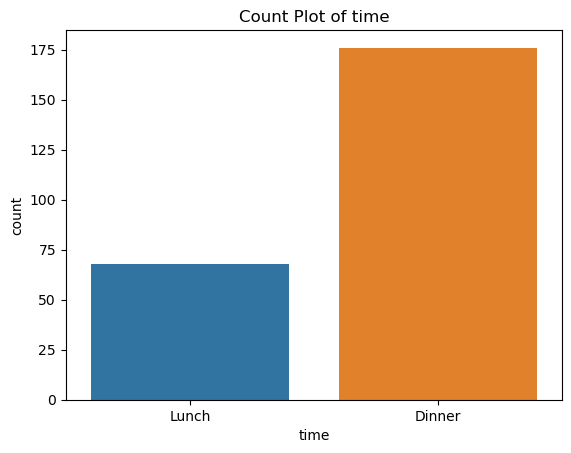

In [36]:
# Create count plot
sns.countplot(x='time', data=tips)
plt.title("Count Plot of time")
plt.show()

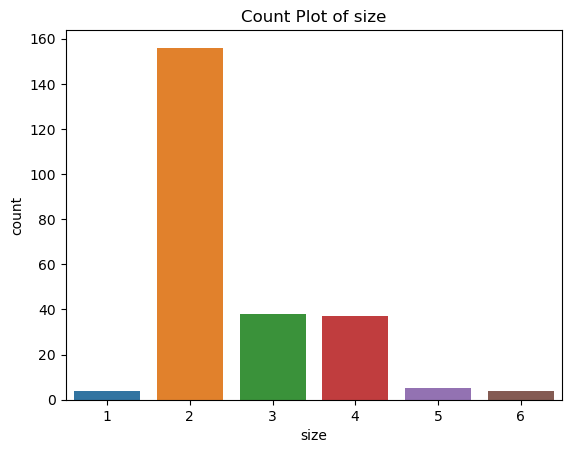

In [37]:
# Create count plot
sns.countplot(x='size', data=tips)
plt.title("Count Plot of size")
plt.show()

# Joint Plot (sns.jointplot)

* Combines scatter plots and histograms (or KDE plots) to show the relationship between two variables along with their distributions.
* Displays the scatter plot in the center with histograms or KDE plots along the margins, helping to understand the relationship and distribution of two variables.

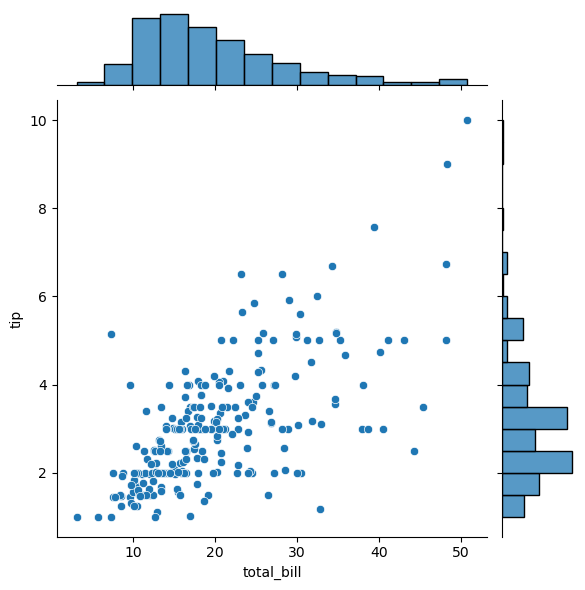

In [38]:
# Create joint plot
sns.jointplot(x='total_bill', y='tip', data=tips, kind='scatter')
plt.show()

# Facet Grid (sns.FacetGrid)

* Creates multiple plots across different subsets of the data.
* Splits the data into subsets based on the values of one or more categorical variables and creates the same plot type for each subset. 
* Useful for comparing patterns across different categories.

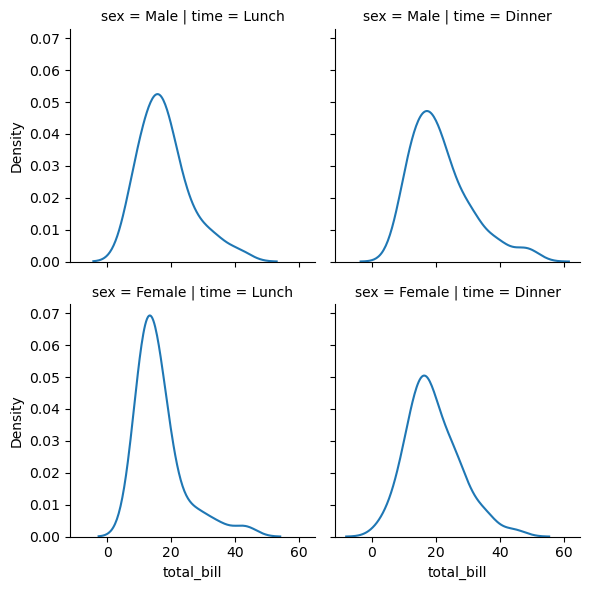

In [9]:
g = sns.FacetGrid(tips, col='time', row='sex')
g.map(sns.kdeplot, 'total_bill')
plt.show()

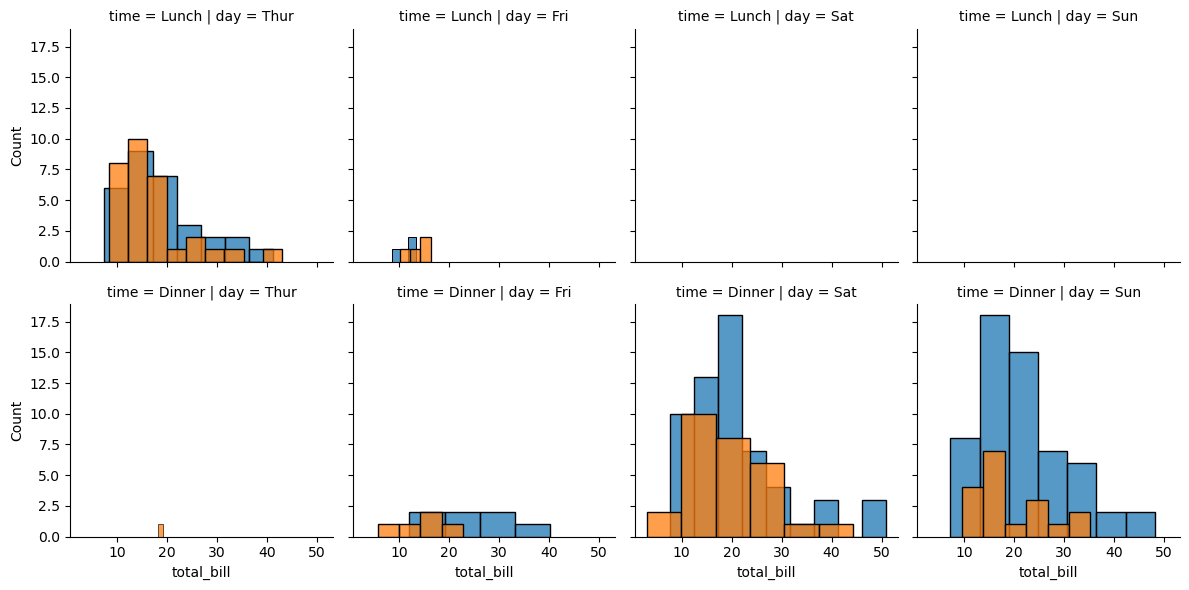

In [42]:
g = sns.FacetGrid(tips, col='day', row='time',hue='sex')
g.map(sns.histplot, 'total_bill')
plt.show()

# Explanation:
* Heatmap: Displays matrix data with color intensities representing values.
* Scatter Plot: Shows how two continuous variables relate to each other.
* Line Plot: Illustrates trends over a continuous variable.
* Bar Plot: Compares average values of a numerical variable across categories.
* Box Plot: Visualizes the distribution and outliers of a numerical variable by category.
* Violin Plot: Combines box plot features with a density plot to show the distribution of data.
* Pair Plot: Provides a grid of scatter plots and histograms to explore relationships between multiple variables.
* Count Plot: Shows the frequency of observations within each category.
* Joint Plot: Combines scatter plots with histograms or KDE plots for detailed relationships between two variables.
* Facet Grid: Creates multiple plots for different subsets of the data, facilitating comparison across categories.